In [115]:
#pip install yfinance
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

%load_ext autoreload
%autoreload 2

In [116]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [117]:
import yfinance as yf

symbol = 'EURUSD=X'
eurusd_df = yf.download(tickers=symbol) # no period brings all
eurusd_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


In [118]:
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5189 entries, 2003-12-01 to 2023-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5189 non-null   float64
 1   High       5189 non-null   float64
 2   Low        5189 non-null   float64
 3   Close      5189 non-null   float64
 4   Adj Close  5189 non-null   float64
 5   Volume     5189 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 283.8 KB


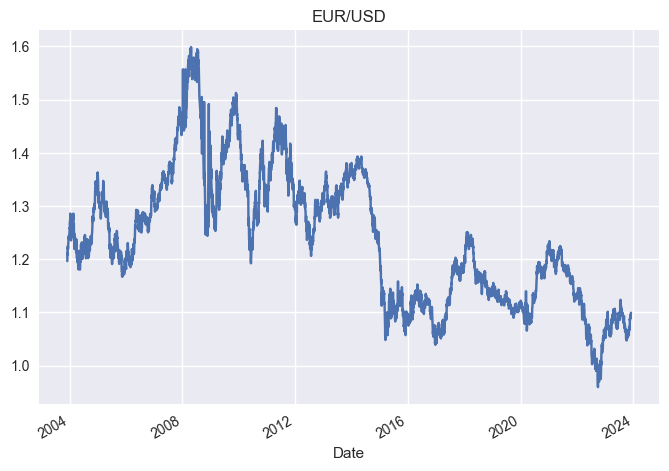

In [119]:
eurusd_df["Close"].plot(title="EUR/USD")
plt.show()

In [120]:
# creating a new column "Returns"
# https://www.geeksforgeeks.org/python-pandas-dataframe-shift/
# 
# every day, period=1, divide with inmediatly before
eurusd_df["Returns"] = np.log(eurusd_df["Close"].div(eurusd_df["Close"].shift(1)))
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5189 entries, 2003-12-01 to 2023-11-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5189 non-null   float64
 1   High       5189 non-null   float64
 2   Low        5189 non-null   float64
 3   Close      5189 non-null   float64
 4   Adj Close  5189 non-null   float64
 5   Volume     5189 non-null   int64  
 6   Returns    5188 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.3 KB


In [121]:
eurusd_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736


Simple Buy and Hold Strategy

In [122]:
eurusd_df.dropna(inplace=True)
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-02 to 2023-11-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
 6   Returns    5188 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.2 KB


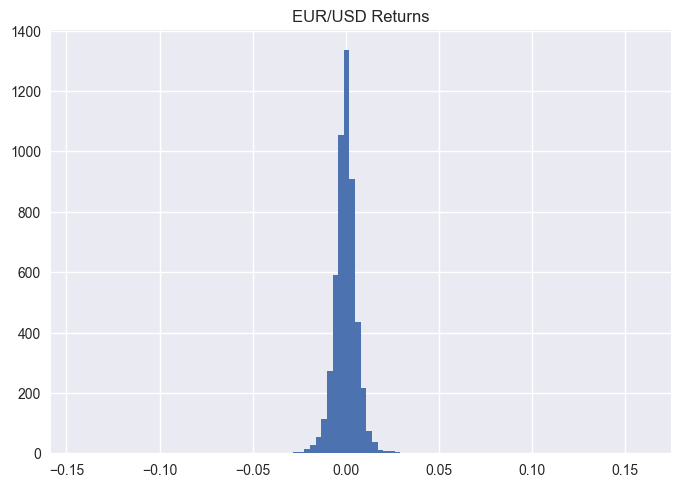

In [123]:
# by ploting distributions we see that most of the time EUR/DOL are very much a like values
eurusd_df.Returns.hist(bins=100)
plt.title("EUR/USD Returns")
plt.show()

In [124]:
# by seeng a negative value it means that Dollar is depreciated and EURO is gaining value in porcentage
eurusd_df.Returns.sum()

-0.08465147394301054

In [125]:
# the value us around 8 cents in change of buying a DOLLAR with EURO
np.exp(eurusd_df.Returns.sum())

0.9188324656587507

In [126]:
eurusd_df.Close[-1]/eurusd_df.Close[0]

0.9094107100437266

In [127]:
eurusd_df.Returns.cumsum().apply(np.exp)

Date
2003-12-02    1.010360
2003-12-03    1.013202
2003-12-04    1.009689
2003-12-05    1.018549
2003-12-08    1.021312
                ...   
2023-11-23    0.910227
2023-11-24    0.911517
2023-11-27    0.914369
2023-11-28    0.915872
2023-11-29    0.918832
Name: Returns, Length: 5188, dtype: float64

In [128]:
eurusd_df["Creturns"] = eurusd_df.Returns.cumsum().apply(np.exp)
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-02 to 2023-11-29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
 6   Returns    5188 non-null   float64
 7   Creturns   5188 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 364.8 KB


In [129]:
eurusd_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns
Date,,,,,,,,
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0,0.010307,1.010360
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0,0.002809,1.013202
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0,-0.003473,1.009689
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0,0.008736,1.018549
2003-12-08,1.216797,1.224005,1.215407,1.222001,1.222001,0,0.002709,1.021312


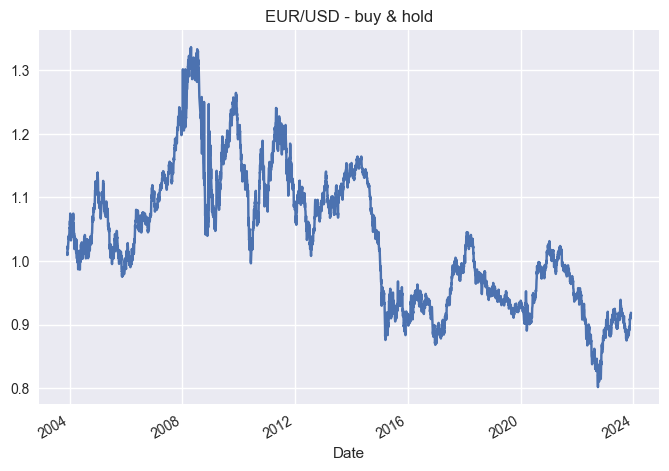

In [130]:
eurusd_df["Creturns"].plot(title="EUR/USD - buy & hold")
plt.show()

In [131]:
# absolute performance in money, Dollar is 0.91 of Euro
eurusd_df.Creturns.iloc[-1]

0.9188324656587503

In [132]:
# absolut performance in percentage, Dollar lost 8.56% with Euro
eurusd_df.Returns.sum()

-0.08465147394301054

In [133]:
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.0,5188.000000,5188.000000
mean,1.237339,1.241966,1.232297,1.237365,1.237365,0.0,-0.000016,1.034153
std,0.126736,0.127456,0.127092,0.126730,0.126730,0.0,0.007179,0.105917
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021
25%,1.127548,1.131475,1.123469,1.127637,1.127637,0.0,-0.003253,0.942445
50%,1.225468,1.230610,1.219958,1.225633,1.225633,0.0,0.000013,1.024347
75%,1.331044,1.336005,1.325205,1.331186,1.331186,0.0,0.003268,1.112565
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227


In [134]:
# annualized metrics
# means in percentage yearly
eurusd_df.Returns.mean()*252

-0.00411182949761732

In [135]:
# annual risk of investment
eurusd_df.Returns.std()*np.sqrt(252)

0.11395905005076706

In [136]:
eurusd_df["Cummax"] = eurusd_df.Creturns.cummax()
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-02 to 2023-11-29
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
 6   Returns    5188 non-null   float64
 7   Creturns   5188 non-null   float64
 8   Cummax     5188 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 405.3 KB


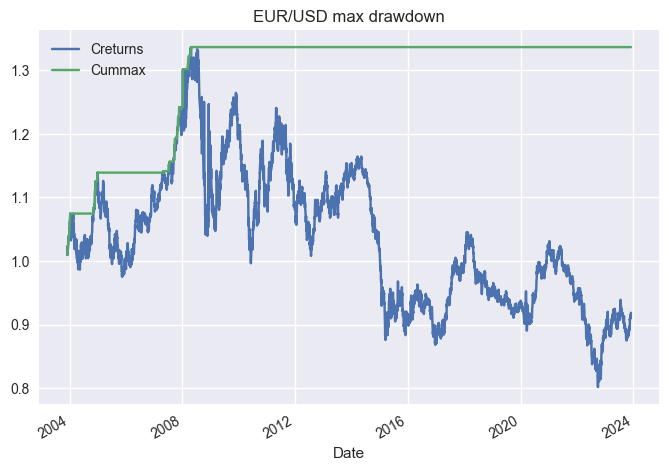

In [137]:
eurusd_df[["Creturns", "Cummax"]].dropna().plot(title="EUR/USD max drawdown")
plt.show()

In [138]:
drawdown = eurusd_df["Cummax"] - eurusd_df["Creturns"]
drawdown.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5188 entries, 2003-12-02 to 2023-11-29
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5188 non-null   float64
dtypes: float64(1)
memory usage: 81.1 KB


In [139]:
drawdown.head()

Date
2003-12-02    0.000000
2003-12-03    0.000000
2003-12-04    0.003513
2003-12-05    0.000000
2003-12-08    0.000000
dtype: float64

In [140]:
drawdown.describe()

count    5188.000000
mean        0.259149
std         0.144983
min         0.000000
25%         0.136193
50%         0.266647
75%         0.393782
max         0.534206
dtype: float64

Crossover Strategy

In [141]:
# interactive plots
# import it or install it
try:
    import cufflinks as cf
except:
    %pip install cufflinks
    import cufflinks as cf

symbol = 'BOLSAA.MX'
bolsaamx_df = yf.download(tickers=symbol) # no period brings all
bolsaamx_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-06-13,16.490000,20.000000,16.400000,16.490000,8.713952,125989800
2008-06-16,16.360001,16.980000,16.200001,16.360001,8.645257,15919100
2008-06-17,15.510000,16.440001,15.400000,15.510000,8.196085,18128400
2008-06-18,15.540000,15.700000,15.100000,15.540000,8.211938,7887700
2008-06-19,15.540000,15.880000,15.220000,15.540000,8.211938,6927200


In [142]:
qf = cf.QuantFig(df=bolsaamx_df.loc["2022" : "2023"])

In [143]:
# strategy in short sma = 20 periods
# long sma = 100 periods
# periods growing we have less detail in lectures
cf.set_config_file(offline = True)
qf.add_sma(periods=20)
qf.add_sma(periods=100)

In [144]:
# crossover means that some times SMA(100) is up and SMA(20) is down and viceversa, normal is former, crossover is SMA(20) up ad SMA(100) down
qf.iplot(title="Bolsa MX", name="BolsaMX")

In [145]:
eurusd_df.info()
sma_s = 50
sma_l = 200

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5188 entries, 2003-12-02 to 2023-11-29
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5188 non-null   float64
 1   High       5188 non-null   float64
 2   Low        5188 non-null   float64
 3   Close      5188 non-null   float64
 4   Adj Close  5188 non-null   float64
 5   Volume     5188 non-null   int64  
 6   Returns    5188 non-null   float64
 7   Creturns   5188 non-null   float64
 8   Cummax     5188 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 405.3 KB


In [146]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/
# we take info of every 50 consecutive places
eurusd_df.Close.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

In [147]:
eurusd_df["SMA_S"] = eurusd_df.Close.rolling(sma_s).mean()
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.0,5188.000000,5188.000000,5188.000000,5139.000000
mean,1.237339,1.241966,1.232297,1.237365,1.237365,0.0,-0.000016,1.034153,1.293301,1.238130
std,0.126736,0.127456,0.127092,0.126730,0.126730,0.0,0.007179,0.105917,0.085462,0.125018
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973
25%,1.127548,1.131475,1.123469,1.127637,1.127637,0.0,-0.003253,0.942445,1.336227,1.124366
50%,1.225468,1.230610,1.219958,1.225633,1.225633,0.0,0.000013,1.024347,1.336227,1.224016
75%,1.331044,1.336005,1.325205,1.331186,1.331186,0.0,0.003268,1.112565,1.336227,1.327592
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162


In [148]:
eurusd_df["SMA_L"] = eurusd_df.Close.rolling(sma_l).mean()
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S,SMA_L
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.0,5188.000000,5188.000000,5188.000000,5139.000000,4989.000000
mean,1.237339,1.241966,1.232297,1.237365,1.237365,0.0,-0.000016,1.034153,1.293301,1.238130,1.240581
std,0.126736,0.127456,0.127092,0.126730,0.126730,0.0,0.007179,0.105917,0.085462,0.125018,0.119511
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973,1.031059
25%,1.127548,1.131475,1.123469,1.127637,1.127637,0.0,-0.003253,0.942445,1.336227,1.124366,1.127404
50%,1.225468,1.230610,1.219958,1.225633,1.225633,0.0,0.000013,1.024347,1.336227,1.224016,1.231165
75%,1.331044,1.336005,1.325205,1.331186,1.331186,0.0,0.003268,1.112565,1.336227,1.327592,1.336179
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162,1.519657


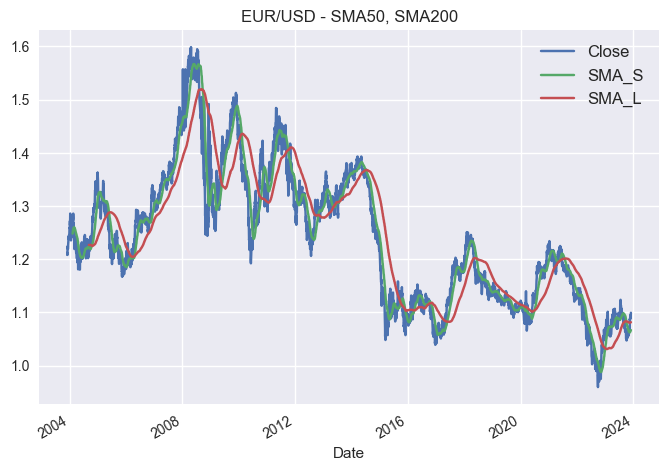

In [149]:
eurusd_df[["Close", "SMA_S", "SMA_L"]].plot(title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [150]:
qf = cf.QuantFig(df=bolsaamx_df.loc["2023" :])

In [151]:
qf.iplot(title="Bolsa-MX-2023", name="BolsaMX23")

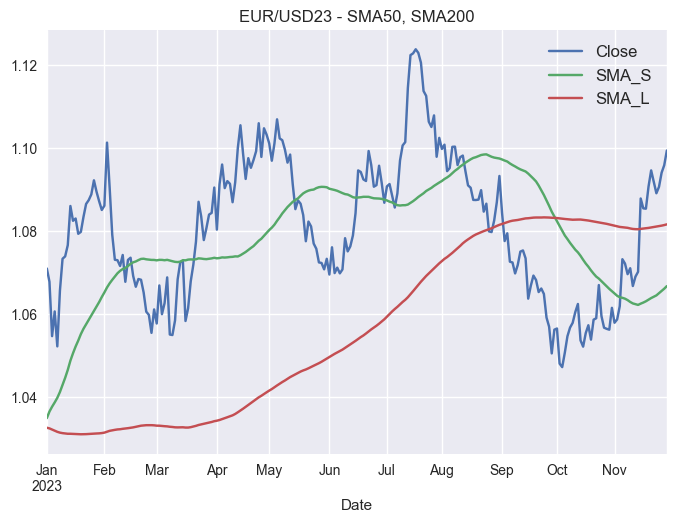

In [152]:
eurusd_df[["Close", "SMA_S", "SMA_L"]].loc["2023"].plot(title="EUR/USD23 - SMA{}, SMA{}".format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [153]:
# creating position column to be short or long
# 1 is sell short, -1 is buy long
eurusd_df["Position"] = np.where(eurusd_df["SMA_S"] > eurusd_df["SMA_L"], 1, -1)
eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S,SMA_L,Position
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.0,5188.000000,5188.000000,5188.000000,5139.000000,4989.000000,5188.000000
mean,1.237339,1.241966,1.232297,1.237365,1.237365,0.0,-0.000016,1.034153,1.293301,1.238130,1.240581,-0.023130
std,0.126736,0.127456,0.127092,0.126730,0.126730,0.0,0.007179,0.105917,0.085462,0.125018,0.119511,0.999829
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973,1.031059,-1.000000
25%,1.127548,1.131475,1.123469,1.127637,1.127637,0.0,-0.003253,0.942445,1.336227,1.124366,1.127404,-1.000000
50%,1.225468,1.230610,1.219958,1.225633,1.225633,0.0,0.000013,1.024347,1.336227,1.224016,1.231165,-1.000000
75%,1.331044,1.336005,1.325205,1.331186,1.331186,0.0,0.003268,1.112565,1.336227,1.327592,1.336179,1.000000
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162,1.519657,1.000000


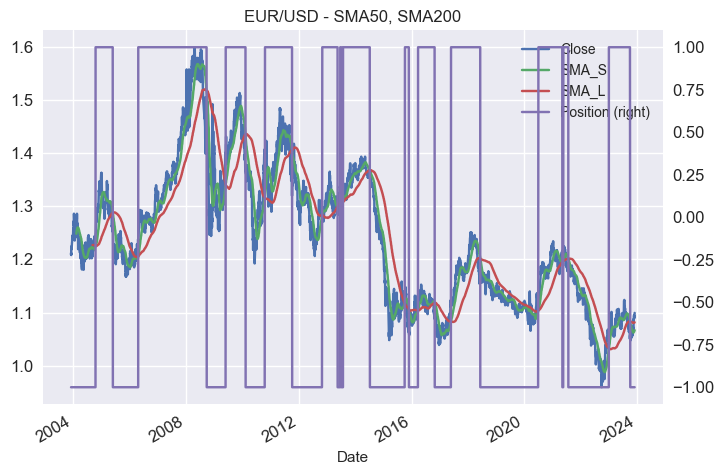

In [154]:
# 1 is sell short, -1 is buy long
eurusd_df[["Close", "SMA_S", "SMA_L", "Position"]].plot(secondary_y="Position", title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l), fontsize=12)
plt.show()

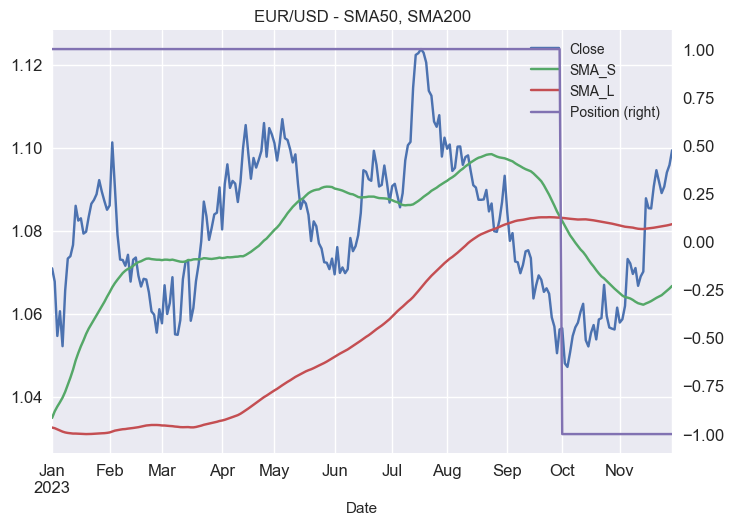

In [155]:
# 1 is sell short, -1 is buy long
eurusd_df.loc["2023", ["Close", "SMA_S", "SMA_L", "Position"]].plot(secondary_y="Position", title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l), fontsize=12)
plt.show()

Optimal Strategy

In [156]:
# https://www.forextraders.com/forex-education/forex-indicators/simple-moving-average-strategy/
# https://trendspider.com/learning-center/what-is-the-sma-indicator-simple-moving-average/
def run_strategy(SMA):
    data = eurusd_df.copy()
    data["Returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["Position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["Strategy"] = data.Position.shift(1) * data["Returns"]
    data.dropna(inplace=True)
    
    return data[["Returns", "Strategy"]].sum().apply(np.exp)

In [157]:
# periods mean time
run_strategy((50, 200))

Returns     0.911148
Strategy    1.354456
dtype: float64

In [158]:
run_strategy((10, 50))

Returns     0.866062
Strategy    1.065070
dtype: float64

In [159]:
run_strategy((22, 252))

Returns     0.849011
Strategy    1.322858
dtype: float64

In [160]:
def run_strategy2(SMA):
    data = eurusd_df.copy()
    data["Returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    
    data["Position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["Strategy"] = data.Position.shift(1) * data["Returns"]
    data.dropna(inplace=True)
    
    return -data[["Returns", "Strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [161]:
# import it or install it
try:
    import scipy
except:
    %pip install scipy
    import cufflinks
from scipy.optimize import brute
# we will have the arguments to work with run strategy function
# brute force finds the minimization of a function
rranges = (slice(10, 50, 1), slice(100, 252, 1))
print(rranges)
brute_strats = brute(run_strategy2, rranges)
print(brute_strats)

(slice(10, 50, 1), slice(100, 252, 1))
[ 29. 160.]


In [162]:
# we won 2.7
run_strategy((29, 160))

Returns     0.886027
Strategy    2.740647
dtype: float64

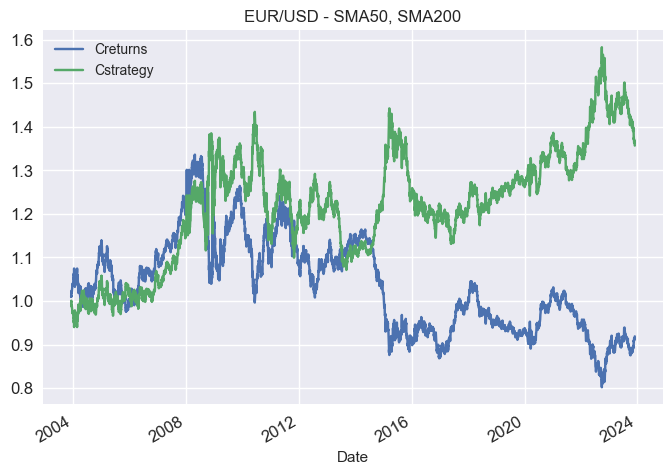

In [163]:
eurusd_df["Position"] = np.where(eurusd_df["SMA_S"] > eurusd_df["SMA_L"], 1, -1)
eurusd_df["Strategy"] = eurusd_df.Position.shift(1) * eurusd_df["Returns"]
eurusd_df["Cstrategy"] = eurusd_df.Strategy.cumsum().apply(np.exp)

eurusd_df[["Creturns", "Cstrategy"]].plot(title="EUR/USD - SMA{}, SMA{}".format(sma_s, sma_l), fontsize=12)
plt.show()

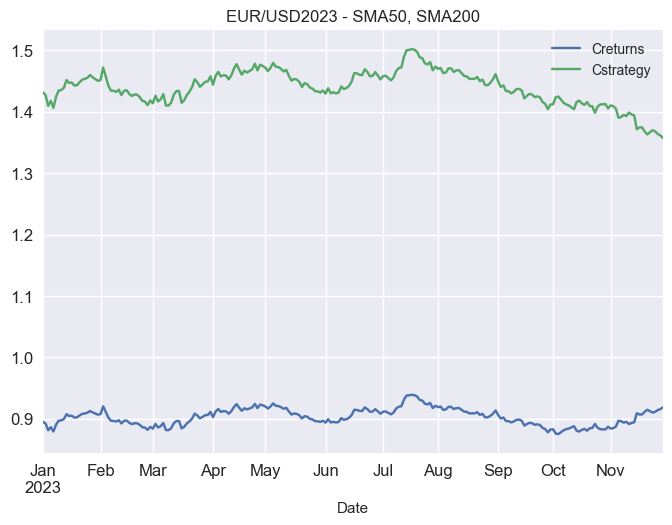

In [164]:
eurusd_df.loc["2023", ["Creturns", "Cstrategy"]].plot(title="EUR/USD2023 - SMA{}, SMA{}".format(sma_s, sma_l), fontsize=12)
plt.show()

In [165]:

eurusd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Creturns,Cummax,SMA_S,SMA_L,Position,Strategy,Cstrategy
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.0,5188.000000,5188.000000,5188.000000,5139.000000,4989.000000,5188.000000,5187.000000,5187.000000
mean,1.237339,1.241966,1.232297,1.237365,1.237365,0.0,-0.000016,1.034153,1.293301,1.238130,1.240581,-0.023130,0.000059,1.219279
std,0.126736,0.127456,0.127092,0.126730,0.126730,0.0,0.007179,0.105917,0.085462,0.125018,0.119511,0.999829,0.007178,0.130961
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0,-0.143324,0.802021,1.010360,0.987973,1.031059,-1.000000,-0.159632,0.940123
25%,1.127548,1.131475,1.123469,1.127637,1.127637,0.0,-0.003253,0.942445,1.336227,1.124366,1.127404,-1.000000,-0.003093,1.131156
50%,1.225468,1.230610,1.219958,1.225633,1.225633,0.0,0.000013,1.024347,1.336227,1.224016,1.231165,-1.000000,0.000130,1.229306
75%,1.331044,1.336005,1.325205,1.331186,1.331186,0.0,0.003268,1.112565,1.336227,1.327592,1.336179,1.000000,0.003393,1.304901
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0,0.159632,1.336227,1.336227,1.567162,1.519657,1.000000,0.143324,1.582928


In [169]:
# 43.67% of outperformance
# back testing should recalculate all with sma_s = 29, sma_l = 160 and see how everything changes to maximize
outperform = eurusd_df.Cstrategy.iloc[-1] - eurusd_df.Creturns.iloc[-1]
outperform

0.43821028177220644

SMA backtester

In [184]:
class SMABacktester :
    def __init__(self) -> None:
        print("Inner class")
    def __init__(self, symbol):
        self.symbol = symbol
        self.df = yf.download(tickers=self.symbol) # no period brings all
        self.df.head()

    def getSymbol(self, symbol):
        return self.df.Close[[symbol]]

symbol = ('EURUSD=X', 'AUDEUR=X', 'USDGBP=X')
#tester = SMABacktester(('EURUSD=X', 'AUDEUR=X', 'USDGBP=X'))
tester = SMABacktester(symbol)

[*********************100%%**********************]  3 of 3 completed


In [186]:
#tester.getSymbol('AUDEUR=X')
tester.df[:'AUDEUR=X']

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [AUDEUR=X] of type str

In [183]:
print(list(tester.df))

[('Adj Close', 'AUDEUR=X'), ('Adj Close', 'EURUSD=X'), ('Adj Close', 'USDGBP=X'), ('Close', 'AUDEUR=X'), ('Close', 'EURUSD=X'), ('Close', 'USDGBP=X'), ('High', 'AUDEUR=X'), ('High', 'EURUSD=X'), ('High', 'USDGBP=X'), ('Low', 'AUDEUR=X'), ('Low', 'EURUSD=X'), ('Low', 'USDGBP=X'), ('Open', 'AUDEUR=X'), ('Open', 'EURUSD=X'), ('Open', 'USDGBP=X'), ('Volume', 'AUDEUR=X'), ('Volume', 'EURUSD=X'), ('Volume', 'USDGBP=X')]


In [187]:
tester.df.head()

Adj Close                       Close                        High  \
            AUDEUR=X  EURUSD=X USDGBP=X AUDEUR=X  EURUSD=X USDGBP=X AUDEUR=X   
Date                                                                           
2003-12-01   0.60798  1.196501  0.58187  0.60798  1.196501  0.58187  0.60827   
2003-12-02   0.60551  1.208897  0.57793  0.60551  1.208897  0.57793  0.60901   
2003-12-03   0.60764  1.212298  0.57867  0.60764  1.212298  0.57867  0.60887   
2003-12-04   0.60838  1.208094  0.58116  0.60838  1.208094  0.58116  0.61002   
2003-12-05   0.60419  1.218695  0.57700  0.60419  1.218695  0.57700  0.60872   

                                   Low                        Open            \
            EURUSD=X USDGBP=X AUDEUR=X  EURUSD=X USDGBP=X AUDEUR=X  EURUSD=X   
Date                                                                           
2003-12-01  1.204007  0.58194  0.60121  1.194401  0.57897  0.60121  1.203398   
2003-12-02  1.210903  0.58231  0.60379  1.194600  0.57733  0.60772  1.196101   
2003-12-03  1.213003  0.57964  0.60459  1.207700  0.57743  0.60558  1.209000   
2003-12-04  1.214403  0.58197  0.60588  1.204398  0.57837  0.60779  1.212004   
2003-12-05  1.219096  0.58146  0.60295  1.206593  0.57700  0.60853  1.207802   

                      Volume                    
           USDGBP=X AUDEUR=X EURUSD=X USDGBP=X  
Date                                            
2003-12-01  0.58011      0.0      0.0      0.0  
2003-12-02  0.58173      0.0      0.0      0.0  
2003-12-03  0.57787      0.0      0.0      0.0  
2003-12-04  0.57890      0.0      0.0      0.0  
2003-12-05  0.58119      0.0      0.0      0.0